In [33]:
import torch
from torch import nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [125]:
def dsd(weight,sparity=0.5):
    #稀疏性
    assert sparity>=0 and sparity<=1
    weight.requires_grad=False
    #数据量
    N=weight.numel()
    I,O,K,K=weight.shape
    #稀疏后
    k = int(N*(1-sparity))
    data=weight.numpy().reshape(-1)
    importance = np.abs(data)
    index= np.argsort(importance)[:k]
    data[index]=0
    data.reshape(I,O,K,K)
    return weight

(array([1886327., 1887910., 1885731., 1889133., 1886186., 1887735.,
        1888389., 1885553., 1889908., 1887496.]),
 array([-1.0416667e-02, -8.3333338e-03, -6.2500006e-03, -4.1666673e-03,
        -2.0833341e-03, -9.3132257e-10,  2.0833323e-03,  4.1666655e-03,
         6.2499987e-03,  8.3333319e-03,  1.0416665e-02], dtype=float32),
 <BarContainer object of 10 artists>)

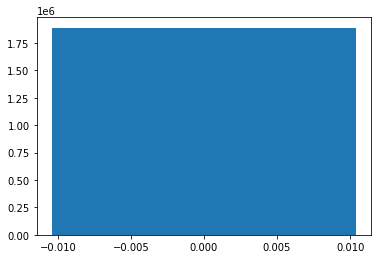

In [135]:
layer = nn.Conv2d(1024,2048,kernel_size=3)
weight = layer.weight
weight.requires_grad=False
data= weight.numpy().reshape(-1)
plt.hist(data)

(array([1886327., 1887910., 1885731., 1888644.,       0., 3774873.,
        1887926., 1885553., 1889908., 1887496.]),
 array([-1.0416667e-02, -8.3333338e-03, -6.2500006e-03, -4.1666673e-03,
        -2.0833341e-03, -9.3132257e-10,  2.0833323e-03,  4.1666655e-03,
         6.2499987e-03,  8.3333319e-03,  1.0416665e-02], dtype=float32),
 <BarContainer object of 10 artists>)

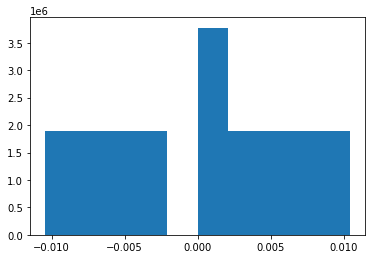

In [136]:
new_weight= dsd(weight,sparity=0.8)
plt.hist(new_weight.numpy().reshape(-1))

In [143]:
a = torch.randn(5,5)

In [155]:
a.

tensor([[ 0.6811,  0.3490, -1.2928, -0.1420, -0.4998],
        [ 1.3307,  0.8540,  1.5353, -1.3690,  0.2087],
        [ 0.0182, -0.5359,  0.1880,  0.3850,  0.3356],
        [ 0.6335,  1.6608, -0.4896,  0.1043, -0.1825],
        [ 1.0496,  0.9572,  0.1337, -0.0870,  0.4799]])

# 一维过滤

In [13]:
a = np.array([1,2,3,4,56,6,7,8])
mask_a = a>5
mask_a
a*mask_a

array([ 0,  0,  0,  0, 56,  6,  7,  8])

# 四维过滤

In [46]:
a = np.random.rand(2,3,5,5)
mask_a =np.abs(a)>0.2
mask_a
a*mask_a

array([[[[0.        , 0.        , 0.26527438, 0.        , 0.27726402],
         [0.88712649, 0.73753115, 0.6027898 , 0.37945899, 0.79337602],
         [0.41369   , 0.6405585 , 0.82922971, 0.34294   , 0.63406644],
         [0.96203153, 0.84653007, 0.32671136, 0.5822713 , 0.        ],
         [0.44578248, 0.88329653, 0.        , 0.57976013, 0.98782781]],

        [[0.24000532, 0.99643847, 0.38881539, 0.7876425 , 0.71114132],
         [0.21828056, 0.87602466, 0.60355179, 0.22412506, 0.47746835],
         [0.83193168, 0.88807439, 0.        , 0.64601197, 0.42238136],
         [0.62888385, 0.        , 0.99423812, 0.98488749, 0.28207214],
         [0.78823454, 0.78277209, 0.85728278, 0.        , 0.25300835]],

        [[0.86452805, 0.58678765, 0.65200598, 0.90559489, 0.68566882],
         [0.        , 0.79188567, 0.9033275 , 0.29208194, 0.321251  ],
         [0.        , 0.73984877, 0.        , 0.75378431, 0.        ],
         [0.25596488, 0.65037689, 0.28303909, 0.        , 0.24175983],
  

In [47]:
data = pd.DataFrame(a.reshape(-1))

(array([11., 17., 24., 12.,  9., 10., 14., 16., 22., 15.]),
 array([0.02193518, 0.11944173, 0.21694828, 0.31445483, 0.41196138,
        0.50946793, 0.60697447, 0.70448102, 0.80198757, 0.89949412,
        0.99700067]),
 <BarContainer object of 10 artists>)

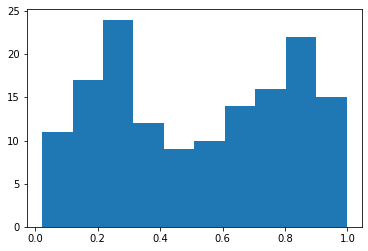

In [48]:
plt.hist(data)